In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
import warnings
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [50]:
df = pd.read_csv('D:/train.csv')
df_boston = pd.read_csv('D:/BostonHousing.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,-1,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,1,0
4,5,0,3,4,0,35.0,0,0,4,8.0500,-1,0


In [12]:
df = pd.DataFrame(df)
for column in df.select_dtypes(include=['object']).columns:
    df[column], unique = pd.factorize(df[column])

In [14]:
X = df.drop(columns = ['Survived', 'Name', 'Ticket'])

In [15]:
X = X.dropna() 

In [16]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,0,22.0,1,0,7.2500,-1,0
1,2,1,1,38.0,1,0,71.2833,0,1
2,3,3,1,26.0,0,0,7.9250,-1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,3,0,35.0,0,0,8.0500,-1,0


Титаник

K-MEANS

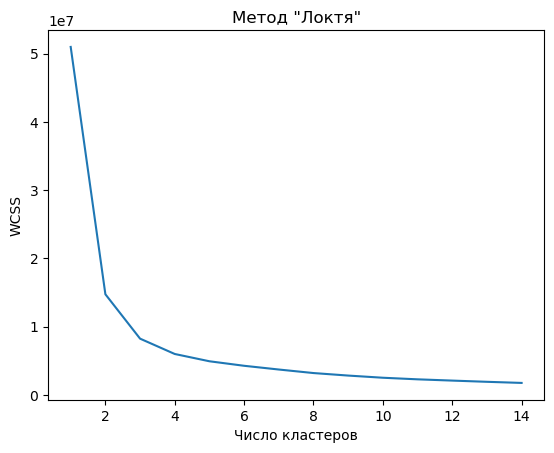

In [17]:
warnings.filterwarnings('ignore')
wcss = []
t_max = 15

# Применим k-средних для k от 1 до 10
for i in range(1, t_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Визуализация результатов

plt.plot(range(1, t_max), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

DBSCAN

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [73]:
from sklearn.metrics import silhouette_score
from tqdm import tqdm
# # Генерация простых данных для демонстрации
# data, _ = make_blobs(n_samples=500, centers=8, cluster_std=0.60, random_state=0)
best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(5,30)):
    for k in range(5,300,1):
        epsilon = k/1000
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(scaled_X)
        try:
            score = silhouette_score(scaled_X, clusters)
            silhouette_coefficients[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,score}

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:25<00:00,  3.42s/it]


In [75]:
silhouette_coefficients

{}

In [23]:
best_params

{-0.12814846253776535, 8}

In [76]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

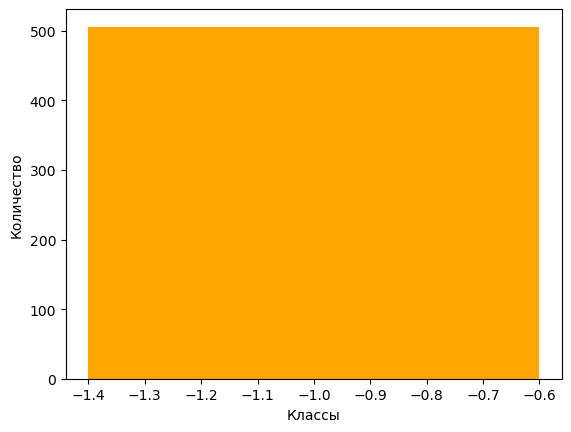

In [74]:
counter = Counter(clusters)
plt.bar(counter.keys(), counter.values(), color='orange')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

Иерархическая

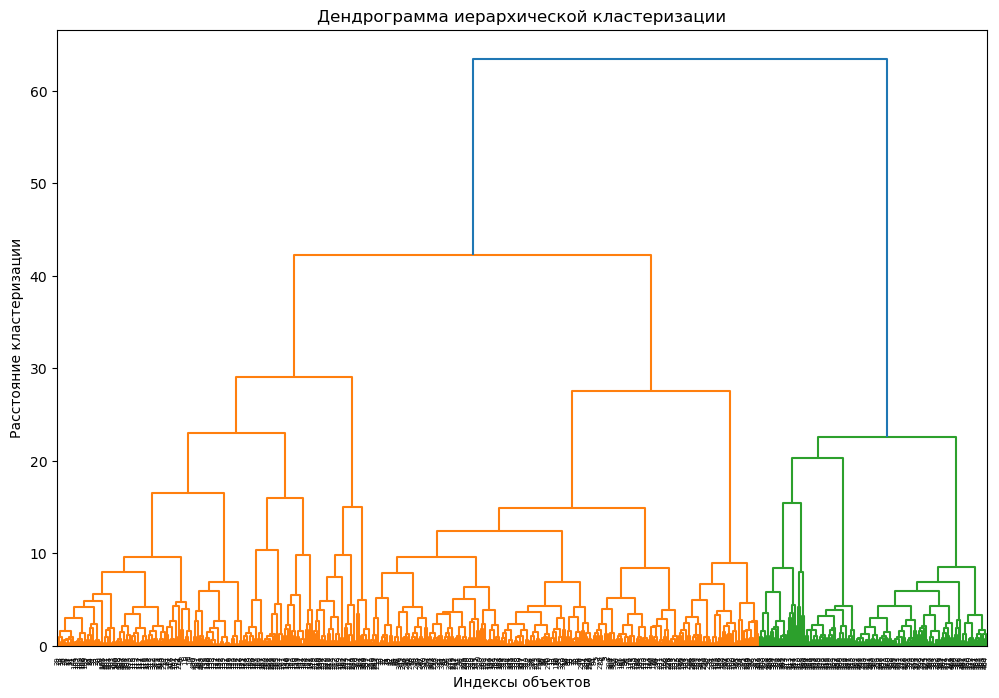

In [80]:
linked = linkage(scaled_X, method='ward')  # 'ward' минимизирует внутрикластерные различия

# Построение дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Иерархическая кластеризация')
plt.xlabel('Индексы объектов')
plt.ylabel('Расстояние кластеризации')
plt.show()

In [97]:
n_clusters = 8 # нужное количество кластеров
model_titanic = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

# Выполняем кластеризацию
clusters_t = model_titanic.fit_predict(scaled_X)

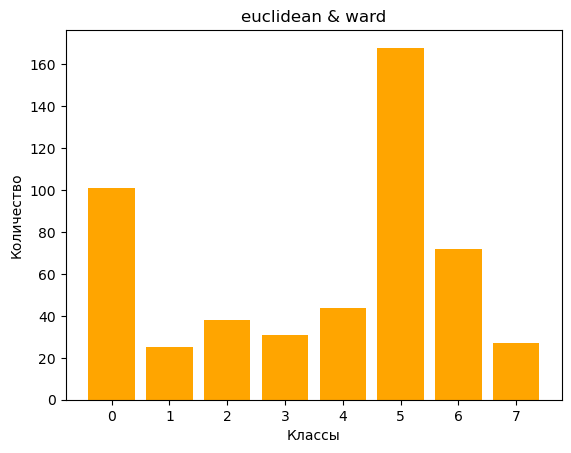

In [98]:
counter = Counter(clusters_t)
plt.bar(counter.keys(), counter.values(), color='orange')
plt.title('euclidean & ward')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

Бостон

In [3]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
X_boston = df_boston.drop(columns = ['medv'])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_boston)

K-MEANS

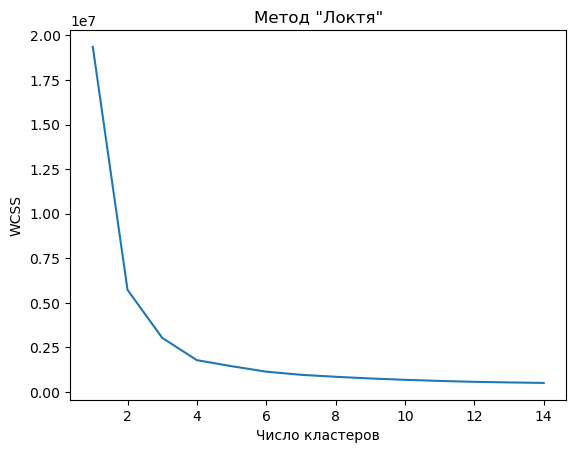

In [28]:
warnings.filterwarnings('ignore')
wcss = []
t_max = 15

# Применим k-средних для k от 1 до 10
for i in range(1, t_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_boston)
    wcss.append(kmeans.inertia_)
# Визуализация результатов

plt.plot(range(1, t_max), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

DBSCAN

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

In [71]:
dbscan = DBSCAN(eps=0.85, min_samples=7)
clusters1 = dbscan.fit_predict(X_scaled)

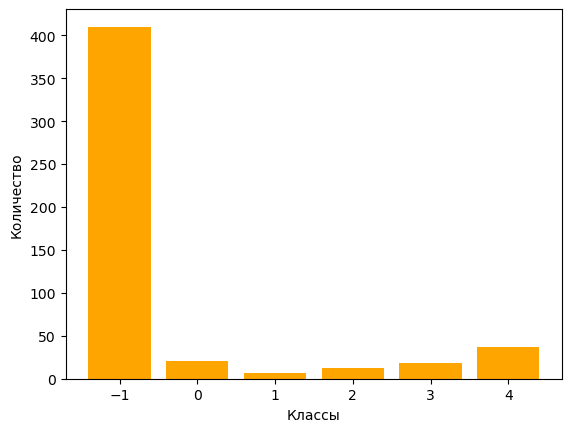

In [72]:
counter = Counter(clusters1)
plt.bar(counter.keys(), counter.values(), color='orange')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

In [63]:
# # Генерация простых данных для демонстрации
# data, _ = make_blobs(n_samples=500, centers=8, cluster_std=0.60, random_state=0)
best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients_b = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(5,30)):
    for k in range(5,300,1):
        epsilon = k/1000
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(X_scaled)
        try:
            score = silhouette_score(X_scaled, clusters)
            silhouette_coefficients_b[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,score}
            print(f'best param: {best_params}')

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:05<00:00,  2.61s/it]


In [66]:
silhouette_coefficients_b

{}

In [65]:
best_params

{-0.12814846253776535, 8}

Иерархическая 

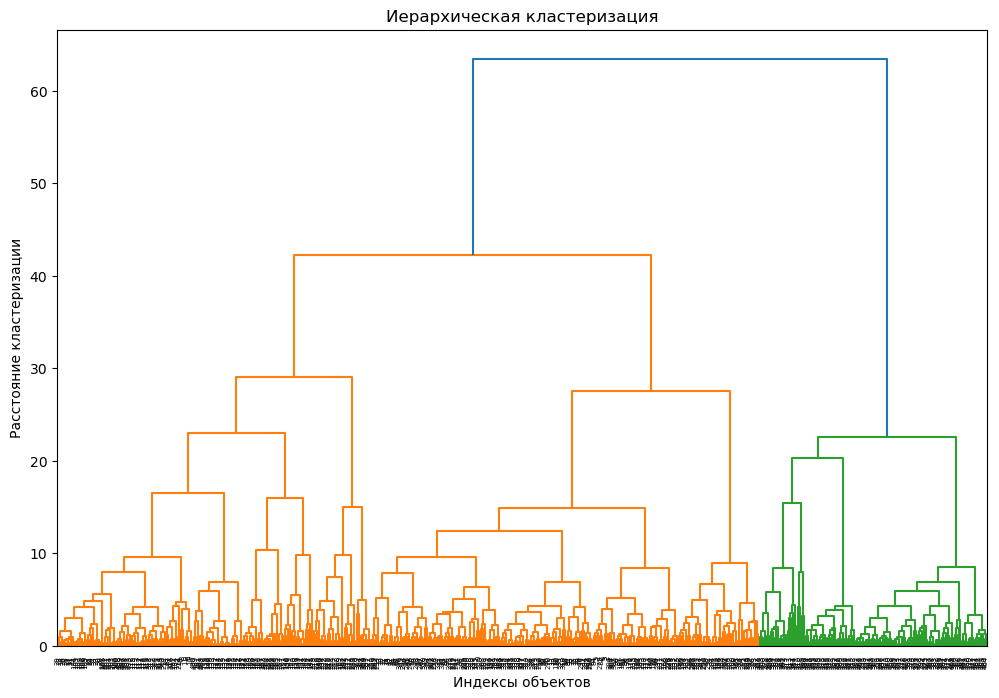

In [81]:
linked = linkage(scaled_X, method='ward')  

# Построение дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Иерархическая кластеризация')
plt.xlabel('Индексы объектов')
plt.ylabel('Расстояние кластеризации')
plt.show()

In [83]:
n_clusters = 8  # нужное количество кластеров
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

# Выполняем кластеризацию
clusters = model.fit_predict(X_scaled)

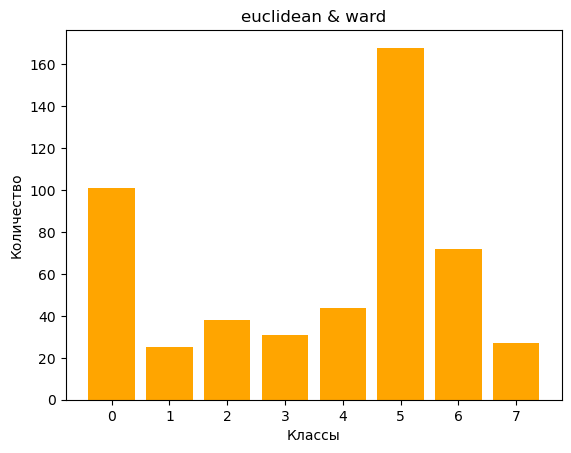

In [88]:
counter = Counter(clusters)
plt.bar(counter.keys(), counter.values(), color='orange')
plt.title('euclidean & ward')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

In [93]:
model2 = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')

# Выполняем кластеризацию
clusters2 = model2.fit_predict(X_scaled)

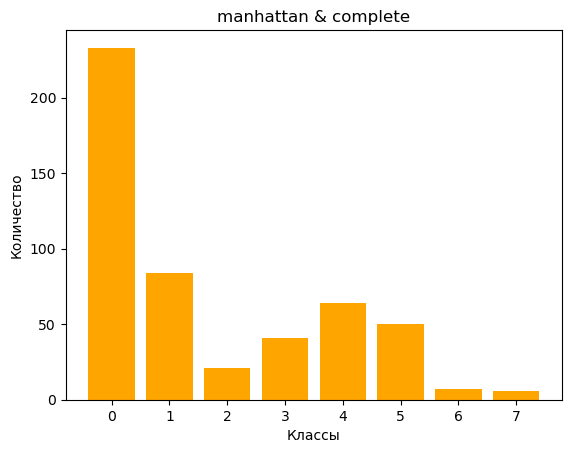

In [94]:
counter = Counter(clusters2)
plt.bar(counter.keys(), counter.values(), color='orange')
plt.title('manhattan & complete')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()